In [13]:
import pandas as pd
from matplotlib import pyplot as pl
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
%matplotlib inline

In [14]:
a = pd.read_csv('taxa-de-sucesso-ufc.csv', decimal=',', na_values='-')

In [15]:
ts_2013_medio = a['TS 2013'].mean()
ts_2013_medio

64.025925925925918

In [24]:
ts_2013_10_menores = a[[u'Curso', 'Período'.encode('utf-8'), u'TS 2013']].sort('TS 2013', ascending=True)[:10]
ts_2013_10_menores['Taxa de Sucesso'] = ts_2013_10_menores['TS 2013'].apply(lambda x: '{}%'.format(x))
del ts_2013_10_menores['TS 2013']
with open('ts_2013_10_menores.tex', 'w') as f:
    f.write(ts_2013_10_menores.to_latex(bold_rows=True, index=False))

In [7]:
a.head()

,Código UFC,Código INEP,Curso,Período,Ranking 2013,Ranking 2012,Ranking 2011,TS 2013,TS 2012,TS 2011
0,57,37274,Filosofia - Licenciatura,Noturno,1,45,57,223.1,43.8,34.6
1,35,13976,Geografia - Licenciatura,Diurno,2,6,8,219.0,100.0,101.6
2,52,13967,Pedagogia,Diurno,3,14,19,143.6,84.3,81.4
3,205,99308,Odontologia - Sobral,Diurno,4,63,67,135.0,NaN,7.5
4,45,14000,Educação Física - Licenciatura,Diurno,5,20,17,124.0,76.0,84.0


In [82]:
a['TS_medio'] = a[['TS 2013', 'TS 2012', 'TS 2011']].apply(lambda x: x.mean(), axis=1)

In [83]:
a.sort('TS_medio')[:10]

,Código UFC,Código INEP,Curso,Período,Ranking 2013,Ranking 2012,Ranking 2011,TS 2013,TS 2012,TS 2011,TS_medio
80,NaN,116834,Ciências Sociais - Licenciatura,Noturno,81,NaN,NaN,6.8,NaN,NaN,6.800000
77,37.0,25822,Letras - Português-Alemão,Diurno,78,61,68,17.6,10.5,7.1,11.733333
79,NaN,1000000.0,Redes de Computadores - Quixadá,Noturno,80,NaN,NaN,13.3,NaN,NaN,13.300000
65,203,99300,Engenharia da Computação - Sobral,Diurno,66,59,64,26.8,13.9,20.0,20.233333
76,23,99572,Engenharia Metalúrgica,Diurno,77,58,63,18.3,20.0,22.5,20.266667
71,204,99302,Engenharia Elétrica - Sobral,Diurno,72,57,66,25.0,20.7,15.2,20.300000
74,401,106167,Sistemas de Informação - Quixadá,Diurno,75,56,65,22.0,22.2,17.1,20.433333
72,48,13977,Matemática - Bacharelado,Diurno,73,60,60,24.4,12.5,30.8,22.566667
70,37C,34433,Letras - Português-Francês,Diurno,71,54,62,25.0,23.1,25.0,24.366667
66,NaN,150096,Design de Produto - Cariri,Noturno,67,NaN,NaN,25.5,NaN,NaN,25.500000


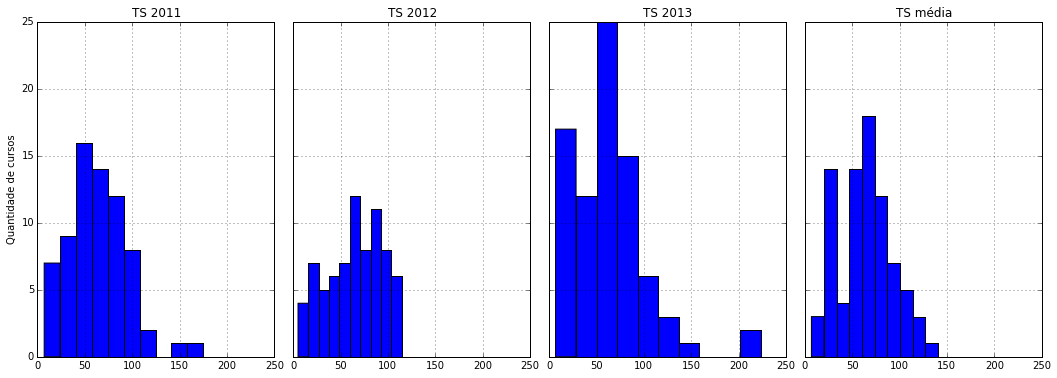

In [102]:
fig, (ax1, ax2, ax3, ax4) = pl.subplots(1, 4, figsize=(18, 6), sharey=True, sharex=True)
a['TS 2011'].plot(kind='hist', ax=ax1)
ax1.set_title('TS 2011')
a['TS 2012'].plot(kind='hist', ax=ax2)
ax2.set_title('TS 2012')
a['TS 2013'].plot(kind='hist', ax=ax3)
ax3.set_title('TS 2013')
a['TS_medio'].plot(kind='hist', ax=ax4)
ax4.set_title('TS média')

for ax in (ax1, ax2, ax3, ax4):
    
    ax.set_ylabel('')
    
ax1.set_ylabel('Quantidade de cursos')
fig.subplots_adjust(wspace=0.08)

fig.savefig('taxa-de-sucesso-ufc-hist.png')